# Exercise 1 Implementation

Training

In [1]:
# Imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage

# Load the source file with the face data
mat_content = sio.loadmat('face.mat')

In [2]:
# Store face data and classification
face_data = mat_content['X']
face_label = mat_content['l']

# Append the matching data and labels into array 'faces': labels are not needed for PCA training (unsupervised learning)
# but we need it for assessing our algorithms during testing
faces = np.append(face_data, face_label, axis=0)
print(faces, faces.shape)

# Transpose in preparation for division into training and testing material
faces_transposed = faces.T
print (faces_transposed, faces_transposed.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]
 [  1   1   1 ...  52  52  52]] (2577, 520)
[[106 103 103 ...  36  41   1]
 [130 129 130 ...  36  35   1]
 [191 185 174 ...  19  17   1]
 ...
 [ 70  62  83 ...  89  94  52]
 [183 250 163 ...  95 106  52]
 [ 77  72  68 ... 103 110  52]] (520, 2577)


[[129 141 146 ...  84  83   6]
 [ 90  92  93 ...  54  47   5]
 [ 77  75  77 ...  51  50  32]
 ...
 [ 80  90  92 ...  31  26  25]
 [ 96  97 124 ... 137 146  32]
 [ 97  96  90 ...  57  54  32]] (416, 2577)
[[138 142 144 ... 139 125  43]
 [125 126 120 ... 115 117  35]
 [ 88 113 131 ...  55  58  46]
 ...
 [ 91  88  85 ... 168 170  10]
 [219 228 238 ...  76  76  18]
 [135 161 167 ...  19  19  45]] (104, 2577)


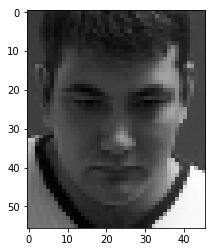

In [3]:
# Divide the data set into training and testing sets: 80% is training, 20% is testing

np.random.shuffle(faces_transposed) # Shuffle the rows (This is why we transposed)
training, test = faces_transposed[:416,:], faces_transposed[416:,:]
print (training, training.shape)
print (test, test.shape)

plt.imshow(np.reshape(training[100, :2576], (46,56)).T, cmap = 'gist_gray') # print 100th image of the training set as a sanity check to make sure we have shuffled along the right dimension of the array

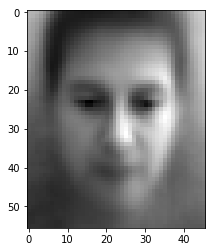

In [4]:
# Now let's start training our image recognition PCA algorithm
# We have face images that are CENTERED and they are of the SAME SIZE (needed for PCA)
# They are normalised for SCALE, ORIENTATION and TRANSLATION

# First, we only need the training and testing set without the labels
# Images are represented as rows
pca_train = training [:, :2576]
pca_test = test [:, :2576]

# Let's compute the mean face image
avg_face = np.mean(pca_train, axis=0)
plt.imshow(np.reshape(avg_face, (46,56)).T, cmap = 'gist_gray')

[[2488.44748521 2369.7745932  2096.85230214 ... -552.76206546
  -587.34629253 -571.51317493]
 [2369.7745932  2590.42150518 2391.63842918 ... -532.60523761
  -571.8193186  -561.45666143]
 [2096.85230214 2391.63842918 2504.77934888 ... -530.9771808
  -553.44987172 -538.5440031 ]
 ...
 [-552.76206546 -532.60523761 -530.9771808  ... 2747.87906227
  2608.7264296  2455.90714566]
 [-587.34629253 -571.8193186  -553.44987172 ... 2608.7264296
  2848.47466138 2716.54505478]
 [-571.51317493 -561.45666143 -538.5440031  ... 2455.90714566
  2716.54505478 2868.15370169]] (2576, 2576)


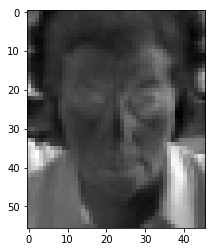

In [5]:
# Now let's subtract the mean face image from all of our training face images
pca_train_norm = pca_train-avg_face # works because of broadcasting
plt.imshow(np.reshape(pca_train_norm[0, :], (46,56)).T, cmap = 'gist_gray') 
# Show the first normalised face image and notice that it is distorted

# Computing the covariance matrix
cov = (np.dot(pca_train_norm.T, pca_train_norm))/416
print (cov, cov.shape)

In [6]:
# Computing the eigenvalues and eigenvectors of the covariance matrix directly and measuring how long it takes

start = time.time()
eigvals, eigvecs = np.linalg.eig(cov) # these are not ordered, so we order them according to the eigenvalues
end = time.time()
print (end-start) # Execution time in seconds

print (eigvals, eigvals.shape)
print (eigvecs, eigvecs.shape)

5.9937450885772705
[9.02743756e+05+0.00000000e+00j 5.24054250e+05+0.00000000e+00j
 4.53834790e+05+0.00000000e+00j ... 1.87271136e-13+6.03862926e-14j
 1.87271136e-13-6.03862926e-14j 2.96322102e-13+0.00000000e+00j] (2576,)
[[-0.01293549+0.00000000e+00j  0.01427159+0.00000000e+00j
   0.01661356+0.00000000e+00j ...  0.00049661+9.90205487e-04j
   0.00049661-9.90205487e-04j -0.00571158+0.00000000e+00j]
 [-0.01356583+0.00000000e+00j  0.01398264+0.00000000e+00j
   0.01731498+0.00000000e+00j ... -0.00030587+2.37956668e-06j
  -0.00030587-2.37956668e-06j -0.00105041+0.00000000e+00j]
 [-0.01420075+0.00000000e+00j  0.01339943+0.00000000e+00j
   0.01989956+0.00000000e+00j ...  0.00036858+1.06264617e-04j
   0.00036858-1.06264617e-04j -0.00119008+0.00000000e+00j]
 ...
 [ 0.0037316 +0.00000000e+00j -0.04673737+0.00000000e+00j
  -0.01088498+0.00000000e+00j ... -0.00507451-6.32302287e-03j
  -0.00507451+6.32302287e-03j  0.00962774+0.00000000e+00j]
 [ 0.00337591+0.00000000e+00j -0.04727781+0.00000000e+00j


In [7]:
# Proving that the eigenvalues and eigenvectors make sense

eig_test_1 = np.dot(cov, eigvecs[:, 0])
eig_test_2 = eigvecs[:, 0]*eigvals[0]

print (eig_test_1-eig_test_2, (eig_test_1-eig_test_2).shape) # The values are basically zero, so the eigenvalue computation is correct

[-2.51020538e-10+0.j  1.16415322e-10+0.j  1.61890057e-10+0.j ...
 -2.72848411e-12+0.j -3.63797881e-12+0.j -6.36646291e-12+0.j] (2576,)


In [8]:
# Taking the real part of the eigenvalues (complex eigenvalues are the result of calculation rounding errors, because the covariance matrix is symmetric)

eigvals = np.real(eigvals)
print (eigvals, eigvals.shape)
eigvecs = np.real(eigvecs)
print (eigvecs, eigvecs.shape)

[9.02743756e+05 5.24054250e+05 4.53834790e+05 ... 1.87271136e-13
 1.87271136e-13 2.96322102e-13] (2576,)
[[-0.01293549  0.01427159  0.01661356 ...  0.00049661  0.00049661
  -0.00571158]
 [-0.01356583  0.01398264  0.01731498 ... -0.00030587 -0.00030587
  -0.00105041]
 [-0.01420075  0.01339943  0.01989956 ...  0.00036858  0.00036858
  -0.00119008]
 ...
 [ 0.0037316  -0.04673737 -0.01088498 ... -0.00507451 -0.00507451
   0.00962774]
 [ 0.00337591 -0.04727781 -0.01046072 ...  0.01781911  0.01781911
  -0.01761472]
 [ 0.00363365 -0.04755506 -0.01268753 ... -0.01367966 -0.01367966
   0.00424322]] (2576, 2576)


In [9]:
# Order eigenvalues and eigenvectors according to the size of the eigenvalues

eigvals = np.abs(eigvals)
index = eigvals.argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
eigvals = eigvals[index]
eigvecs = eigvecs[:,index]
print (index, index.shape)
print (eigvals, eigvals.shape)

# How many zero eigenvalues do we have?

print (np.linalg.matrix_rank(cov)) # We should have 2576 - 415 = 2161 zero eigenvalues
print ((eigvals == np.zeros(eigvals.shape)).sum()) # The rounding errors will give 0 eigenvalues that are precisely zero
print ((eigvals >= np.ones(eigvals.shape)/100000).sum()) # However there are 415 eigenvalues that are larger than 1e-05, which can be considered zero eigenvectors.
print (eigvals.max()) # The largest eigenvalue
print (eigvals[414])
print (eigvals[415])

[   0    1    2 ... 2572 2138 2137] (2576,)
[9.02743756e+05 5.24054250e+05 4.53834790e+05 ... 2.22805546e-14
 7.58957354e-15 7.58957354e-15] (2576,)
415
0
415
902743.755886979
89.59231094154774
3.758917098377232e-11


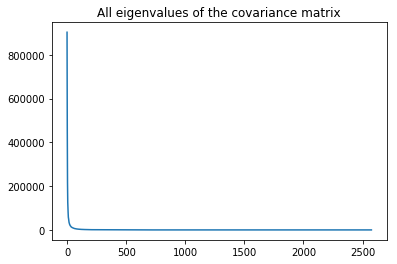

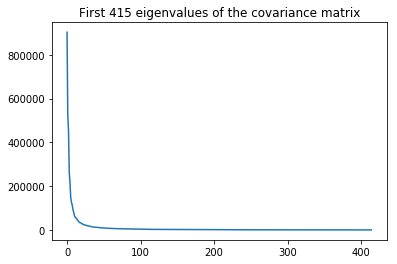

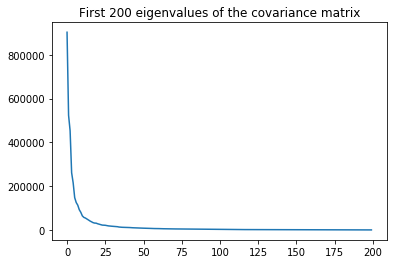

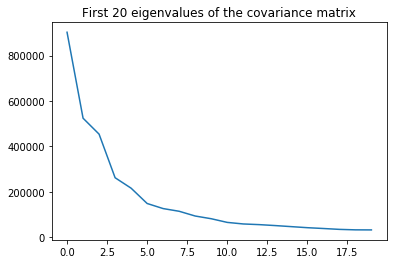

<Figure size 432x288 with 0 Axes>

In [10]:
# Let's visualise the eigenvalues

x = np.arange(0, 2576)

# All of them
plt.plot(x, eigvals) # Clearly out of scale
plt.title('All eigenvalues of the covariance matrix')
plt.figure()

# First 415 of them
plt.plot(x[:415], eigvals[:415]) # Still out of scale
plt.title('First 415 eigenvalues of the covariance matrix')
plt.figure()

# First 200 of them
plt.plot(x[:200], eigvals[:200])
plt.title('First 200 eigenvalues of the covariance matrix')
plt.figure()

# First 20 of them
plt.plot(x[:20], eigvals[:20])
plt.title('First 20 eigenvalues of the covariance matrix')
plt.figure()

plt.show()

In [11]:
# We keep the largest n eigenvalues and theeir corresponding eigenvectors n<=415, the other eigenvalues are zero

n = 400
eigvecs_best = eigvecs[:, :n]
eigvals_best = eigvals[:n]

# Projecting each training data point to the space spanned by the eigenvectors
proj_pca_train_norm = np.zeros((416, n))
for i in range(416):
    proj_pca_train_norm [i, :] = np.dot(pca_train_norm[i, :], eigvecs_best)
    
print (proj_pca_train_norm, proj_pca_train_norm.shape)

# Now in array proj_pca_train_norm, in each row, we have the projected coordinates for each face image

[[ 6.65652940e+02 -9.61576853e+02 -8.87258719e-01 ...  7.75282070e-01
  -4.43725111e+01  3.71411489e+00]
 [-6.88353045e+02  7.15790640e+02 -2.18633198e+02 ...  2.61694974e+01
  -1.57429173e+01  6.63083090e-02]
 [ 7.66194578e+01  6.08206970e+02 -4.55120935e+02 ...  1.69311161e+01
  -7.62501843e+00 -5.82924552e+01]
 ...
 [-2.24568579e+02 -4.72903751e+01  1.16380837e+03 ... -7.59455136e+00
   1.13097652e+01 -1.85063774e+01]
 [-1.34323029e+03 -2.11675626e+02  3.37198441e+02 ... -8.12500491e+00
  -1.55309704e+01 -3.16031874e+00]
 [-4.66774805e+02  1.05117210e+02 -1.98430853e+02 ...  3.45637437e+00
   3.77269664e+00  1.97667790e+00]] (416, 400)


In [12]:
# Let's try to compute the eigenvalues using the low-dimensional method

# First we need to compute the new covariance matrix (1/N)A^T*A
cov_ld = np.dot(pca_train_norm, pca_train_norm.T)/416
print (cov_ld, cov_ld.shape) # as we can see it is NxN (and not DxD as the covariance matrix we had before)

[[ 9548.80226526 -2982.02668606  -102.64281032 ...  -678.70033505
   -233.79864427   432.46334607]
 [-2982.02668606  7238.01695877  1524.73737297 ...   136.90580978
   1109.87480825   886.52862552]
 [ -102.64281032  1524.73737297  4479.1933641  ... -2055.49877602
    373.97983784  2579.94375126]
 ...
 [ -678.70033505   136.90580978 -2055.49877602 ...  9277.09994925
   2325.41510157 -1357.74358117]
 [ -233.79864427  1109.87480825   373.97983784 ...  2325.41510157
  12931.33361928  1039.06435961]
 [  432.46334607   886.52862552  2579.94375126 ... -1357.74358117
   1039.06435961  7822.03548457]] (416, 416)


In [13]:
# Now we compute the eigenvalues and eigenvectors of the new covariance matrix and measure the elapsed time

start_ld = time.time()
eigvals_ld, eigvecs_ld = np.linalg.eig(cov_ld) # these are not ordered, so we order them and the corresponding eigenvalues
end_ld = time.time()
print (end_ld-start_ld)
print (end-start)

# Taking the real part of the eigenvalues (complex eigenvalues are the result of calculation rounding errors, because the covariance matrix is symmetric)

eigvals_ld = np.real(eigvals_ld)
eigvecs_ld = np.real(eigvecs_ld)

# Order eigenvalues and eigenvectors according to the size of the eigenvalues

eigvals_ld = np.abs(eigvals_ld)
index_ld = eigvals_ld.argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
eigvals_ld = eigvals_ld[index_ld]
eigvecs_ld = eigvecs_ld[:,index_ld]
print (eigvals_ld, eigvals_ld.shape)

0.05795598030090332
5.9937450885772705
[9.02743756e+05 5.24054250e+05 4.53834790e+05 2.61833559e+05
 2.15727700e+05 1.48353006e+05 1.25918899e+05 1.14048076e+05
 9.31484366e+04 8.12222147e+04 6.50859558e+04 5.81762316e+04
 5.52253005e+04 5.10535605e+04 4.63916726e+04 4.17691529e+04
 3.81714296e+04 3.43286230e+04 3.22459247e+04 3.19407832e+04
 2.91754304e+04 2.69620287e+04 2.51429291e+04 2.30627560e+04
 2.26218063e+04 2.21951500e+04 2.07823378e+04 1.94694338e+04
 1.85514164e+04 1.80425861e+04 1.74664472e+04 1.65181050e+04
 1.60017895e+04 1.56888109e+04 1.42067833e+04 1.35313601e+04
 1.30510921e+04 1.29065696e+04 1.26708825e+04 1.24815194e+04
 1.21431647e+04 1.18279157e+04 1.11466977e+04 1.08873660e+04
 1.05506267e+04 1.03012393e+04 1.00631126e+04 9.69859942e+03
 9.29810280e+03 9.11766766e+03 8.95372669e+03 8.77545126e+03
 8.60262363e+03 8.23256843e+03 8.04038032e+03 7.85424919e+03
 7.34036245e+03 7.31096507e+03 7.30583750e+03 7.16998894e+03
 7.00117374e+03 6.66527525e+03 6.51430098e+03 

415
0
415
902743.7558869808
89.59231094154747
4.0761385664547945e-12


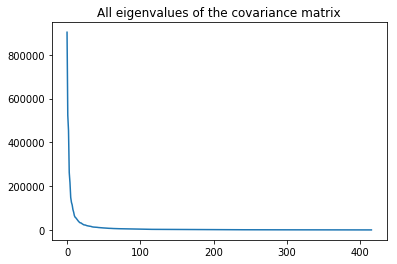

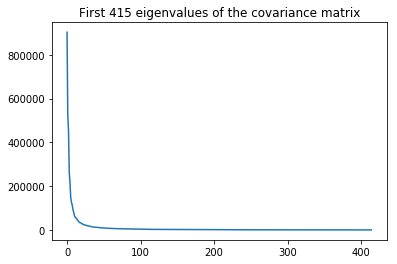

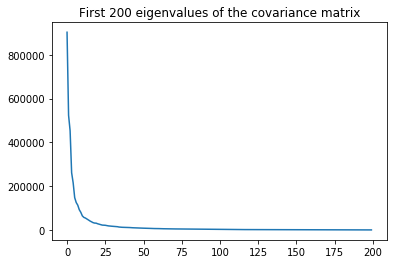

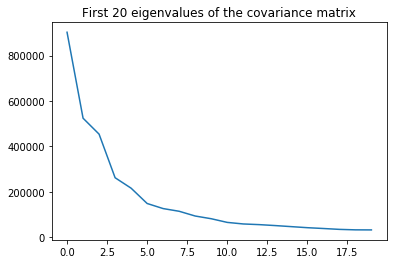

<Figure size 432x288 with 0 Axes>

In [14]:
# How many zero eigenvalues do we have this time?

print (np.linalg.matrix_rank(cov_ld)) # We should have 2576 - 415 = 2161 zero eigenvalues
print ((eigvals_ld == np.zeros(eigvals_ld.shape)).sum()) # The rounding errors will give 0 eigenvalues that are precisely zero
print ((eigvals_ld >= np.ones(eigvals_ld.shape)/100000).sum()) # However there are 415 eigenvalues that are larger than 1e-05, which can be considered zero eigenvectors.
print (eigvals_ld.max()) # The largest eigenvalue
print (eigvals_ld[414])
print (eigvals_ld[415])

# Let's visualise the eigenvalues

x = np.arange(0, 416)

# All of them
plt.plot(x, eigvals_ld) # Clearly out of scale
plt.title('All eigenvalues of the covariance matrix')
plt.figure()

# First 415 of them
plt.plot(x[:415], eigvals_ld[:415]) # Still out of scale
plt.title('First 415 eigenvalues of the covariance matrix')
plt.figure()

# First 200 of them
plt.plot(x[:200], eigvals_ld[:200])
plt.title('First 200 eigenvalues of the covariance matrix')
plt.figure()

# First 20 of them
plt.plot(x[:20], eigvals_ld[:20])
plt.title('First 20 eigenvalues of the covariance matrix')
plt.figure()

plt.show()

In [15]:
# What is the relationship between the eigenvalues and the eigenvectors resulting from the two methods

print (eigvals[:416]-eigvals_ld, (eigvals[:416]-eigvals_ld).shape)
# Therefore the eigenvalues are identical

eigvecs_ld_cmp = np.dot(pca_train_norm.T, eigvecs_ld)
eigvecs_ld_cmp = eigvecs_ld_cmp/np.linalg.norm(eigvecs_ld_cmp,axis=0)
print (eigvecs_ld_cmp, eigvecs_ld_cmp.shape)
print (eigvecs[:, :416], eigvecs[:, :416].shape)
print (eigvecs[:, :416]-eigvecs_ld_cmp)

[-1.74622983e-09 -1.80443749e-09 -2.91038305e-10 -1.45519152e-10
  2.61934474e-10  2.91038305e-10 -3.05590220e-10  0.00000000e+00
  4.80213203e-10 -1.45519152e-11 -1.45519152e-11 -8.73114914e-11
  5.09317033e-11  0.00000000e+00 -2.25554686e-10  2.61934474e-10
  3.63797881e-10 -7.27595761e-11 -8.00355338e-11  3.27418093e-11
  2.83762347e-10  1.30967237e-10  1.34605216e-10 -1.45519152e-11
 -4.36557457e-11 -8.36735126e-11  1.45519152e-11  1.09139364e-11
 -3.27418093e-11 -5.45696821e-11  1.45519152e-11  5.45696821e-11
  1.03682396e-10  1.14596332e-10 -2.00088834e-11 -3.63797881e-11
 -1.03682396e-10  4.36557457e-11  3.63797881e-12  3.63797881e-12
  4.72937245e-11 -1.81898940e-12  7.63975549e-11 -2.18278728e-11
  3.45607987e-11 -7.27595761e-12 -4.18367563e-11  3.81987775e-11
 -2.72848411e-11  1.45519152e-11  3.09228199e-11 -9.09494702e-12
  3.63797881e-11 -7.27595761e-12  2.72848411e-12 -1.72803993e-11
 -1.81898940e-12  3.54702934e-11  1.36424205e-11  0.00000000e+00
 -3.54702934e-11 -2.81943

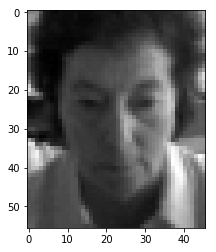

In [16]:
# Let's try to reconstruct one face image, just as a sanity check to see if we can still see a face (worse quality of course, because we did a lossy transformation on it)
face_check = avg_face + np.dot(eigvecs_best, proj_pca_train_norm[0, :])
plt.imshow(np.reshape(face_check, (46,56)).T, cmap = 'gist_gray')

Testing

In [17]:
# Now that we've trained our model, let's test it on our testing data set
# First, let's normalise the testing set (subtract the average face from all face images)

pca_test_norm = pca_test-avg_face # Works because of broadcasting
print (pca_test_norm, pca_test_norm.shape)

# Then let's project each testing image to the eigenspace (space spanned by the best eigenvectors)
proj_pca_test_norm = np.zeros((104, n))
for i in range(104):
    proj_pca_test_norm [i, :] = np.dot(pca_test_norm[i, :], eigvecs_best)

print (proj_pca_test_norm, proj_pca_test_norm.shape)

# Now in array proj_pca_test_norm, in each row, we have the projected coordinates for each face image

[[ 15.40384615  19.85576923  24.77644231 ...  76.88701923  56.53605769
   44.05048077]
 [  2.40384615   3.85576923   0.77644231 ...  29.88701923  32.53605769
   36.05048077]
 [-34.59615385  -9.14423077  11.77644231 ... -19.11298077 -27.46394231
  -22.94951923]
 ...
 [-31.59615385 -34.14423077 -34.22355769 ...  80.88701923  85.53605769
   89.05048077]
 [ 96.40384615 105.85576923 118.77644231 ...  -8.11298077  -6.46394231
   -4.94951923]
 [ 12.40384615  38.85576923  47.77644231 ... -62.11298077 -63.46394231
  -61.94951923]] (104, 2576)
[[  541.05488808  -848.41749348   121.59180844 ...    -5.53125991
     18.7559589     38.44108441]
 [ -776.0223618   -488.2718446   -346.27638881 ...   -28.80187119
     11.84399584     6.66799972]
 [-1095.44250085  -507.07375612    92.71379804 ...   -13.39532359
    -25.34077329    17.94562386]
 ...
 [  971.37999113  -977.14864781  -105.44616561 ...   -17.10770641
    -31.70566172    28.687647  ]
 [-1075.37913567   510.92190366   543.35283071 ...    -7.06

[2565.21143527 2876.81050875 2747.84577667 2621.41241703 3656.0725475
 3078.10436181 2385.2105087  2514.5985293  3267.71305893 3077.24859621
 3354.98103707 2511.41565442 2828.00700399 2440.81550345 3491.95535558
 2884.25134324 2867.70770908 3272.73599902 3004.25750731 2887.20983918
 3596.78686505 2734.62894748 2518.53683572 2715.66402911 2779.636169
 2538.27270018 2606.1382818  3069.8483192  2815.66389989 3236.02854247
 3943.71570076 3563.66192334 3218.67445165 2381.0173008  2896.39753345
 2918.00443926 2599.52912844 2792.18562048 2961.29449744 2475.08127313
 2839.01502375 2661.66268492 2568.50176879 2268.30694755 3772.88708909
 2334.29678942 3125.71719561 3687.41510368 3346.49356727 2940.69882628
 3273.47898529 2968.93465448 3543.43903463 2895.72913523 2865.73438694
 3271.25843913 2916.18425681 3447.69451732 2844.99211549 3260.23667507
 2765.51688529 3226.43699139 3121.08341694 2620.28994866 2900.92968605
 3161.97093755 2671.55294647 3260.95507195 2626.71814794 2752.69427413
 3417.364

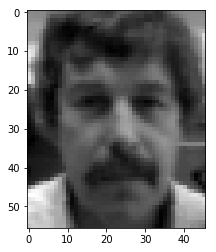

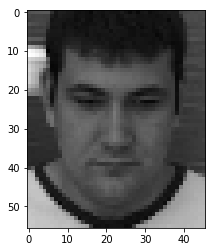

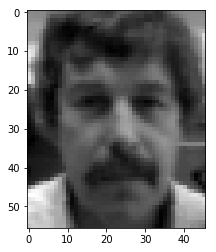

In [18]:
# Let's classify the first image
plt.imshow(np.reshape(pca_test[0, :], (46,56)).T, cmap = 'gist_gray')
plt.figure()

distances = np.zeros(416)

for i in range(416):
    distances[i] = np.linalg.norm(proj_pca_train_norm[i, :]-proj_pca_test_norm[0, :])
    
print (distances, distances.shape)

smallest_distance = distances.min()
smallest_index = distances.argmin()
print (smallest_distance, smallest_index)

# Which identity does it belong to according to the learning set?
print (training[smallest_index, 2576])
# Which identity does it actually belong to?
print (test[0, 2576])

# Print the picture that our picture is the closest to
plt.imshow(np.reshape(pca_train[smallest_index, :], (46,56)).T, cmap = 'gist_gray')
plt.figure()

# Print our actual image
plt.imshow(np.reshape(pca_test[0, :], (46,56)).T, cmap = 'gist_gray')

In [19]:
# Now let's do this for all of the testing images

distances = np.zeros((416, 104)) # In each row we store the distances (1 column = 1 testing image's distances)

for k in range (104):
    for i in range(416):
        distances[i, k] = np.linalg.norm(proj_pca_train_norm[i, :]-proj_pca_test_norm[k, :])
        
# Now we have in each column the distances of the testing images from each of the training images.
# Next step is to find the minimum of each column, and the corresponding row index (per column)
print (distances, distances.shape)

smallest_distance = distances.min(axis=0) # min per columns
smallest_index = distances.argmin(axis=0)
print (smallest_distance, smallest_distance.shape)
print (smallest_index, smallest_index.shape)

# Get the smallest distance image's label
#detected_label = np.zeros (104)
#for j in range(104):
#    detected_label[j] = training[smallest_index[j], 2576]
#print (detected_label, detected_label.shape)

actual_label = test [:, 2576].T

print (actual_label, actual_label.shape)


# Which identity does it belong to according to the learning set?
print (training[smallest_index, 2576], training[smallest_index, 2576].shape)

same = (training[smallest_index, 2576]==actual_label)

print (same, same.shape)

percentage = np.sum(same)/104

print (percentage)


[[2565.21143527 2832.3715342  2927.11457719 ... 1801.24983413
  3444.19653393 3909.41119379]
 [2876.81050875 2460.14044115 2627.98669571 ... 2882.02107485
  2420.13575235 2235.15018207]
 [2747.84577667 2360.61439052 2772.27954454 ... 2395.117221
  2792.78482064 2785.42149104]
 ...
 [2934.6508904  2848.48861331 2555.89018745 ... 2760.58178494
  2599.73690727 3319.80372183]
 [3067.99962367 2445.18366928 2896.89753371 ... 3222.71710511
  2557.00144051 3152.56756261]
 [3082.12091956 2331.5703048  2577.77876283 ... 2679.23329892
  3083.5829309  3004.17285892]] (416, 104)
[2011.9600561  1513.0843252  1355.14951791 1329.65075329 1437.76066508
 1533.6682313  1376.75037347 1486.0008228  1687.02425005 1224.68198862
 1533.7931933  1606.31283056 1662.61881723 1308.58429619 1779.9929432
 1446.95045796 1548.5945602  1482.21371453 1313.28612139 1544.1843259
 1312.35971651 1870.6444883  2001.79806759 2054.22381251  998.82159999
 1237.02594752 1732.3014117  1498.52170922 1060.8148119  2184.29232688
 16

In [20]:
def highdimension():
    eigvals_hd, eigvecs_hd = np.linalg.eig(cov)
    return

#def lowdimension():
#    eigvals2_ld, eigvecs2_ld = np.linalg.eig(cov2)
#    return

def donothing():
    x=1123
    return

#mem_low = max(memory_usage(proc=lowdimension))
mem_high = max(memory_usage(proc=highdimension))
mem_nothing = max(memory_usage(proc=donothing))

#print("Maximum memory used by low dimension way: {0} MiB".format(str(mem_low)))
print("Maximum memory used by high dimension way: {0} MiB".format(str(mem_high)))
print("Maximum memory used by donothing: {0} MiB".format(str(mem_nothing)))

# Check it tomorrow, strange that the memory usage of donothing and lowdimension if the same, but don't know why yet

Maximum memory used by high dimension way: 638.59765625 MiB
Maximum memory used by donothing: 434.76953125 MiB
